# Rotor Boom Length Analysis
This notebook is intended to investigate the expected length of the rotor boom given a certain propeller size and center hub dimensions.

Rotor Boom Properties:

|        Name        |      Properties     |     Description     |
|:------------------:|:-------------------:|:-------------------:|
|  Yield Strength    |      1783 MPa       |     Maximum Stress before Yield    |
|  Youngs Modulus    |       300 GPa       |     Property of the Stiffness      |

Some papers talk about an optimal distance between adjacent motors for improved aerodynamic efficieny.

Within the paper, the length of the arm and distance between adjacent motors is multiplied by a ratio relating to the diameter of the propeller, $D_{propeller}$, installed on the motor. The study explored ratios, $ \sigma = [1.0, 1.2, 1.4, 1.6, 1.8]$, and the effective aerodynamic improvement based on these ratios [1].

$$Arm Length = \sigma \times D_{propeller}$$

Lei [1] however, did not draw any conclusion on a specific function that relates the ratio, $\sigma$, to the aerodynamic performance but within their circumstances a higher ratio did improve the aerodynamic performance of their sUAS(small Unmanned Aircraft System). Thus there is no guarentee that the optimal ratio within Lei's [1] study will be the optimal solution within this study.

### Minimum Rotor Boom Length
The minimum rotor boom length is equal to the propeller diameter. This distance is measured from a point, $O$, with an axis running through it. Point, $O$, acts as the relative origin and is the axis about which the rotor booms are evenly spaced by $60^{\circ}$, in the case of a hexacopter.

This can be shown through the following image proof which is based on an isosceles triangle. For the case of a hexacopter where the rotor boom lengths are equal and the rotor booms are spaced $60^{\circ}$ apart, an equilateral triangle is formed and thus all sides are the same length.

<img src="rboomLengthExplanation.png" alt="drawing" width="600"/>

In [1]:
# Typical Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Visual Aid For the problem definition and Layout

#### Figure 1:
Hexacopter Layout Description:

|        Name        |      Description     |     Value    |
|:------------------|:-------------------:|:-------------------:|
| Wingspan    |     Distance between opposite motor centers       |     900mm   |
| Boom Length    |     CF Boom Length      |     373mm   |
| Boom Hole to Hole Length    |     CF Boom Length      |     345mm   |
| Propeller Size    |     Diameter of propeller      |     431.8mm   |
| Adjacent Distance    |     Distance between adjacent motor centers       |     470mm   |
| Angle    |     Angle between rotor booms       |     60$^{\circ}$   |

<img src="OblongSizeEstimation.png" alt="drawing" width="650"/>

### CF Boom Performance Data

In [14]:
boom_data = pd.read_csv('CSVFiles/clean_CFSquareBoom20Kg2Bolts.csv')
# Space required to mount the motor and boom to the chassis, i.e. where the mounting holes are.
mounting_space = 28 
boom_data["HoleToHoleLength"] = boom_data['TubeLength'] - mounting_space
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength
0,350.0,10.0,3.22471,23.06575,178.78,322.0
1,360.0,10.0,3.53468,23.73175,188.51,332.0
2,370.0,10.0,3.86371,24.39775,194.30,342.0
3,380.0,10.0,4.21243,25.06375,195.67,352.0
4,390.0,10.0,4.58163,25.72975,201.35,362.0


### Propeller Definition

In [15]:
diam = 17 # Propeller Diameter in inches(in)
prop_diam_mm = np.round(diam * 25.4) # Propeller Diameter in millimeters(mm)

print("The following are Rounded Up Values:")
print("Propeller Diameter:",np.round(prop_diam_mm,1),"mm")

# The min dist is the same as the propeller diameter realistically this should be higher.
prop_dist_required = round(prop_diam_mm*1.05 + 1) # +1 for a round number 
print("Min Dist Between Motors:", np.round(prop_dist_required),"mm")
space_between_rotors = prop_dist_required - prop_diam_mm
print("Space Between Rotors:", np.round(space_between_rotors,1),"mm")

The following are Rounded Up Values:
Propeller Diameter: 432.0 mm
Min Dist Between Motors: 455 mm
Space Between Rotors: 23.0 mm


### Boom Length Requirements and Constants

In [16]:
sigma = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0] # sigma as described above
chassis_hole_dist = [105, 125, 150, 175, 200]

### Boom Lengths for $\sigma$ ratios 1.0 - 2.0

In [17]:
min_boom_length = prop_dist_required - chassis_hole_dist[0] + mounting_space
print("Min Boom Length:", min_boom_length,"mm")
sigma_boom_lengths = min_boom_length*np.array(sigma)
print("Sigma Ratios:",sigma_boom_lengths)

Min Boom Length: 378 mm
Sigma Ratios: [378.  453.6 529.2 604.8 680.4 756. ]


### Boom Length Analysis
The following set of code will evaluate the SOLIDWORKS data and apply the following method:
1. Given a chassis hole distance, does the `boom_data["HoleToHoleLength"]` meet the `min_boom_length`? <br>i.e. `boom_data["HoleToHoleLength"]`$\ge$ `min_boom_length`.


2. 
    True: Show the difference greater than<br>
    False: Show the still distance required<br>


3. Calculate the relative ratio of `boom_data["HoleToHoleLength"]` to `min_boom_length`

#### Shortage or Excess of Length compared to `min_boom_length`

In [19]:
boom_data["HoleDiff"] = (boom_data['HoleToHoleLength'] + chassis_hole_dist[0]) - prop_dist_required
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength,HoleDiff
0,350.0,10.0,3.22471,23.06575,178.78,322.0,-28.0
1,360.0,10.0,3.53468,23.73175,188.51,332.0,-18.0
2,370.0,10.0,3.86371,24.39775,194.30,342.0,-8.0
3,380.0,10.0,4.21243,25.06375,195.67,352.0,2.0
4,390.0,10.0,4.58163,25.72975,201.35,362.0,12.0


#### What is the Ratio of Boom Length to `min_boom_length`

In [21]:
def ratio_func(temp_data):
    #print(temp_data)
    if temp_data['HoleDiff'] > 0:
        return np.round((temp_data['HoleToHoleLength']+chassis_hole_dist[0])/prop_dist_required,2)
    else:
        return 1.00
    
boom_data['AeroRatio'] = boom_data.apply(ratio_func,axis=1)
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength,HoleDiff,AeroRatio
0,350.0,10.0,3.22471,23.06575,178.78,322.0,-28.0,1.00
1,360.0,10.0,3.53468,23.73175,188.51,332.0,-18.0,1.00
2,370.0,10.0,3.86371,24.39775,194.30,342.0,-8.0,1.00
3,380.0,10.0,4.21243,25.06375,195.67,352.0,2.0,1.00
4,390.0,10.0,4.58163,25.72975,201.35,362.0,12.0,1.03


In [22]:
print(min_boom_length)
boom_data[boom_data['TubeOD']==15]

378


,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength,HoleDiff,AeroRatio
36,350.0,15.0,0.88417,36.01575,86.152,322.0,-28.0,1.00
37,360.0,15.0,0.96823,37.05175,88.894,332.0,-18.0,1.00
38,370.0,15.0,1.05754,38.08775,91.338,342.0,-8.0,1.00
39,380.0,15.0,1.15218,39.12375,94.129,352.0,2.0,1.00
40,390.0,15.0,1.25225,40.15975,96.659,362.0,12.0,1.03
41,400.0,15.0,1.35801,41.19575,99.567,372.0,22.0,1.05
42,410.0,15.0,1.46963,42.23175,103.560,382.0,32.0,1.07
43,420.0,15.0,1.58711,43.26775,104.770,392.0,42.0,1.09
44,430.0,15.0,1.71066,44.30375,107.750,402.0,52.0,1.11
45,440.0,15.0,1.84054,45.33975,110.350,412.0,62.0,1.14


## Figures and Plotted Results

In [2]:
dfSquare = pd.read_csv("CSVFiles/clean_CFSquareBoom20Kg2Bolts.csv")
dfRound = pd.read_csv("CSVFiles/clean_CFRoundBoom20Kg2Bolts.csv")

dfConcat = pd.concat([dfSquare.assign(dataset='Square'), dfRound.assign(dataset='Round')])

In [8]:
dfConcat = dfConcat[(dfConcat['TubeLength']>=370)&(dfConcat['TubeOD']>10)]

### Stress Curve
Need to do:
1. Find suitable reason for the curve spikes and jumps
2. Verify the curve shapes, do they make sense. Compare to stress vs strain curves.

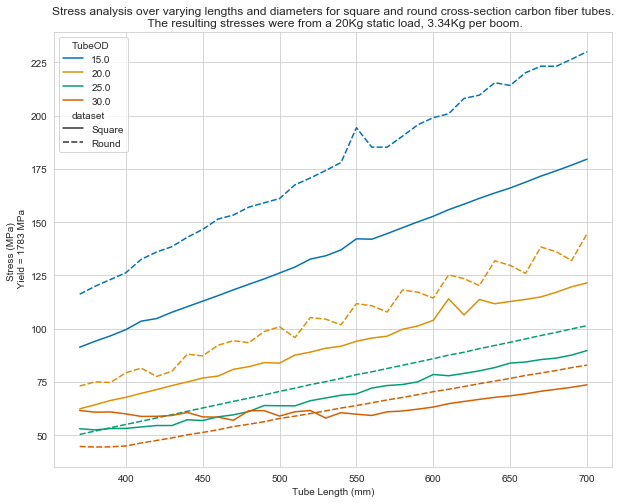

In [10]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Stress1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
#plt.yticks([50,75,100,125,150,175,200,225])
plt.title("Stress analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting stresses were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

In [11]:
fig.savefig("SqRndStressCurve20Kg.png")

### Displacement Curve
The carbon fiber tubes were fixed in the same way and subject to the same applied load at the opposite end of the rotor boom. The test simulated a 20Kg static load with equats to 3.34Kg per rotor boom, the test is a simulation of hovering supporting an all up weight of 20Kg.

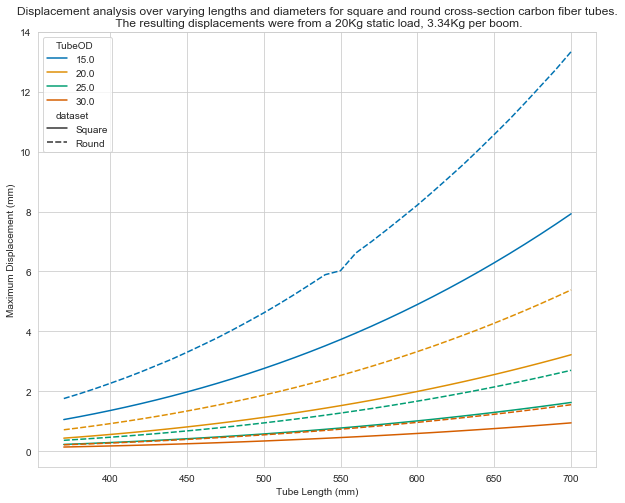

In [12]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Displacement1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Maximum Displacement (mm)")
#plt.yticks([50,75,100,125,150,175,200,225])
plt.title("Displacement analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting displacements were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

In [13]:
fig.savefig("SqRndDispCurve20Kg.png")

## References:
    [1] MDPI and ACS Style Lei, Y.; Huang, Y.; Wang, H. Aerodynamic Performance of an Octorotor SUAV with Different Rotor Spacing in Hover. Processes 2020, 8, 1364. [https://doi.org/10.3390/pr8111364]
   [Link [1]](https://doi.org/10.3390/pr8111364)